##### Abalone prices are dependent on the age of an abalone, which is time intensive. Develop a model to predict the age of the abalone to aid in pricing 

In [143]:
pip install yellowbrick


     -------------------------------------- 282.6/282.6 kB 4.3 MB/s eta 0:00:00


#### Import packages

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
sns.set_context('poster') 
sns.set(rc={'figure.figsize': (10,6)})
sns.set_style('whitegrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError, ResidualsPlot
import pandas as pd

#### Import data

In [3]:
df= pd.read_csv('C:\\Users\\Orie\\Desktop\\InstituteofData\\ProjectDatasets\\Abalone\\abalone.csv')

#### Perform EDA

In [4]:
df.shape

(4177, 9)

In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
# Drop non-Numeric Sex
df.drop(['Sex'], axis=1, inplace=True)

In [7]:
df.isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


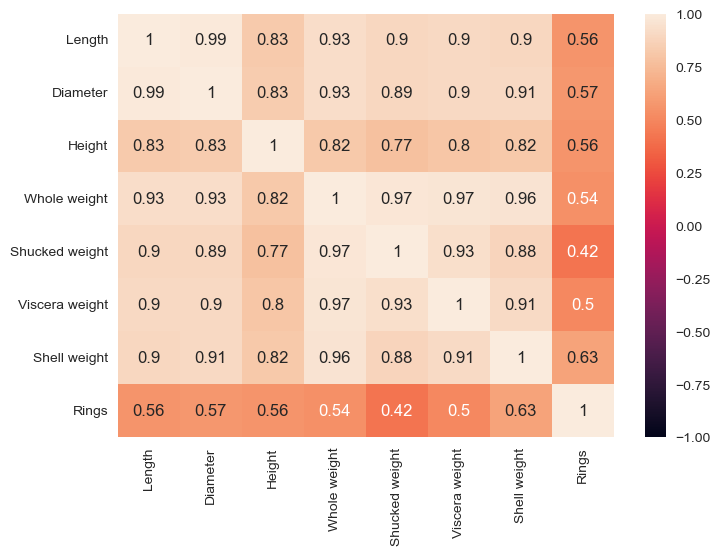

In [11]:
# Investiage which variables are correlated with rings (age)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

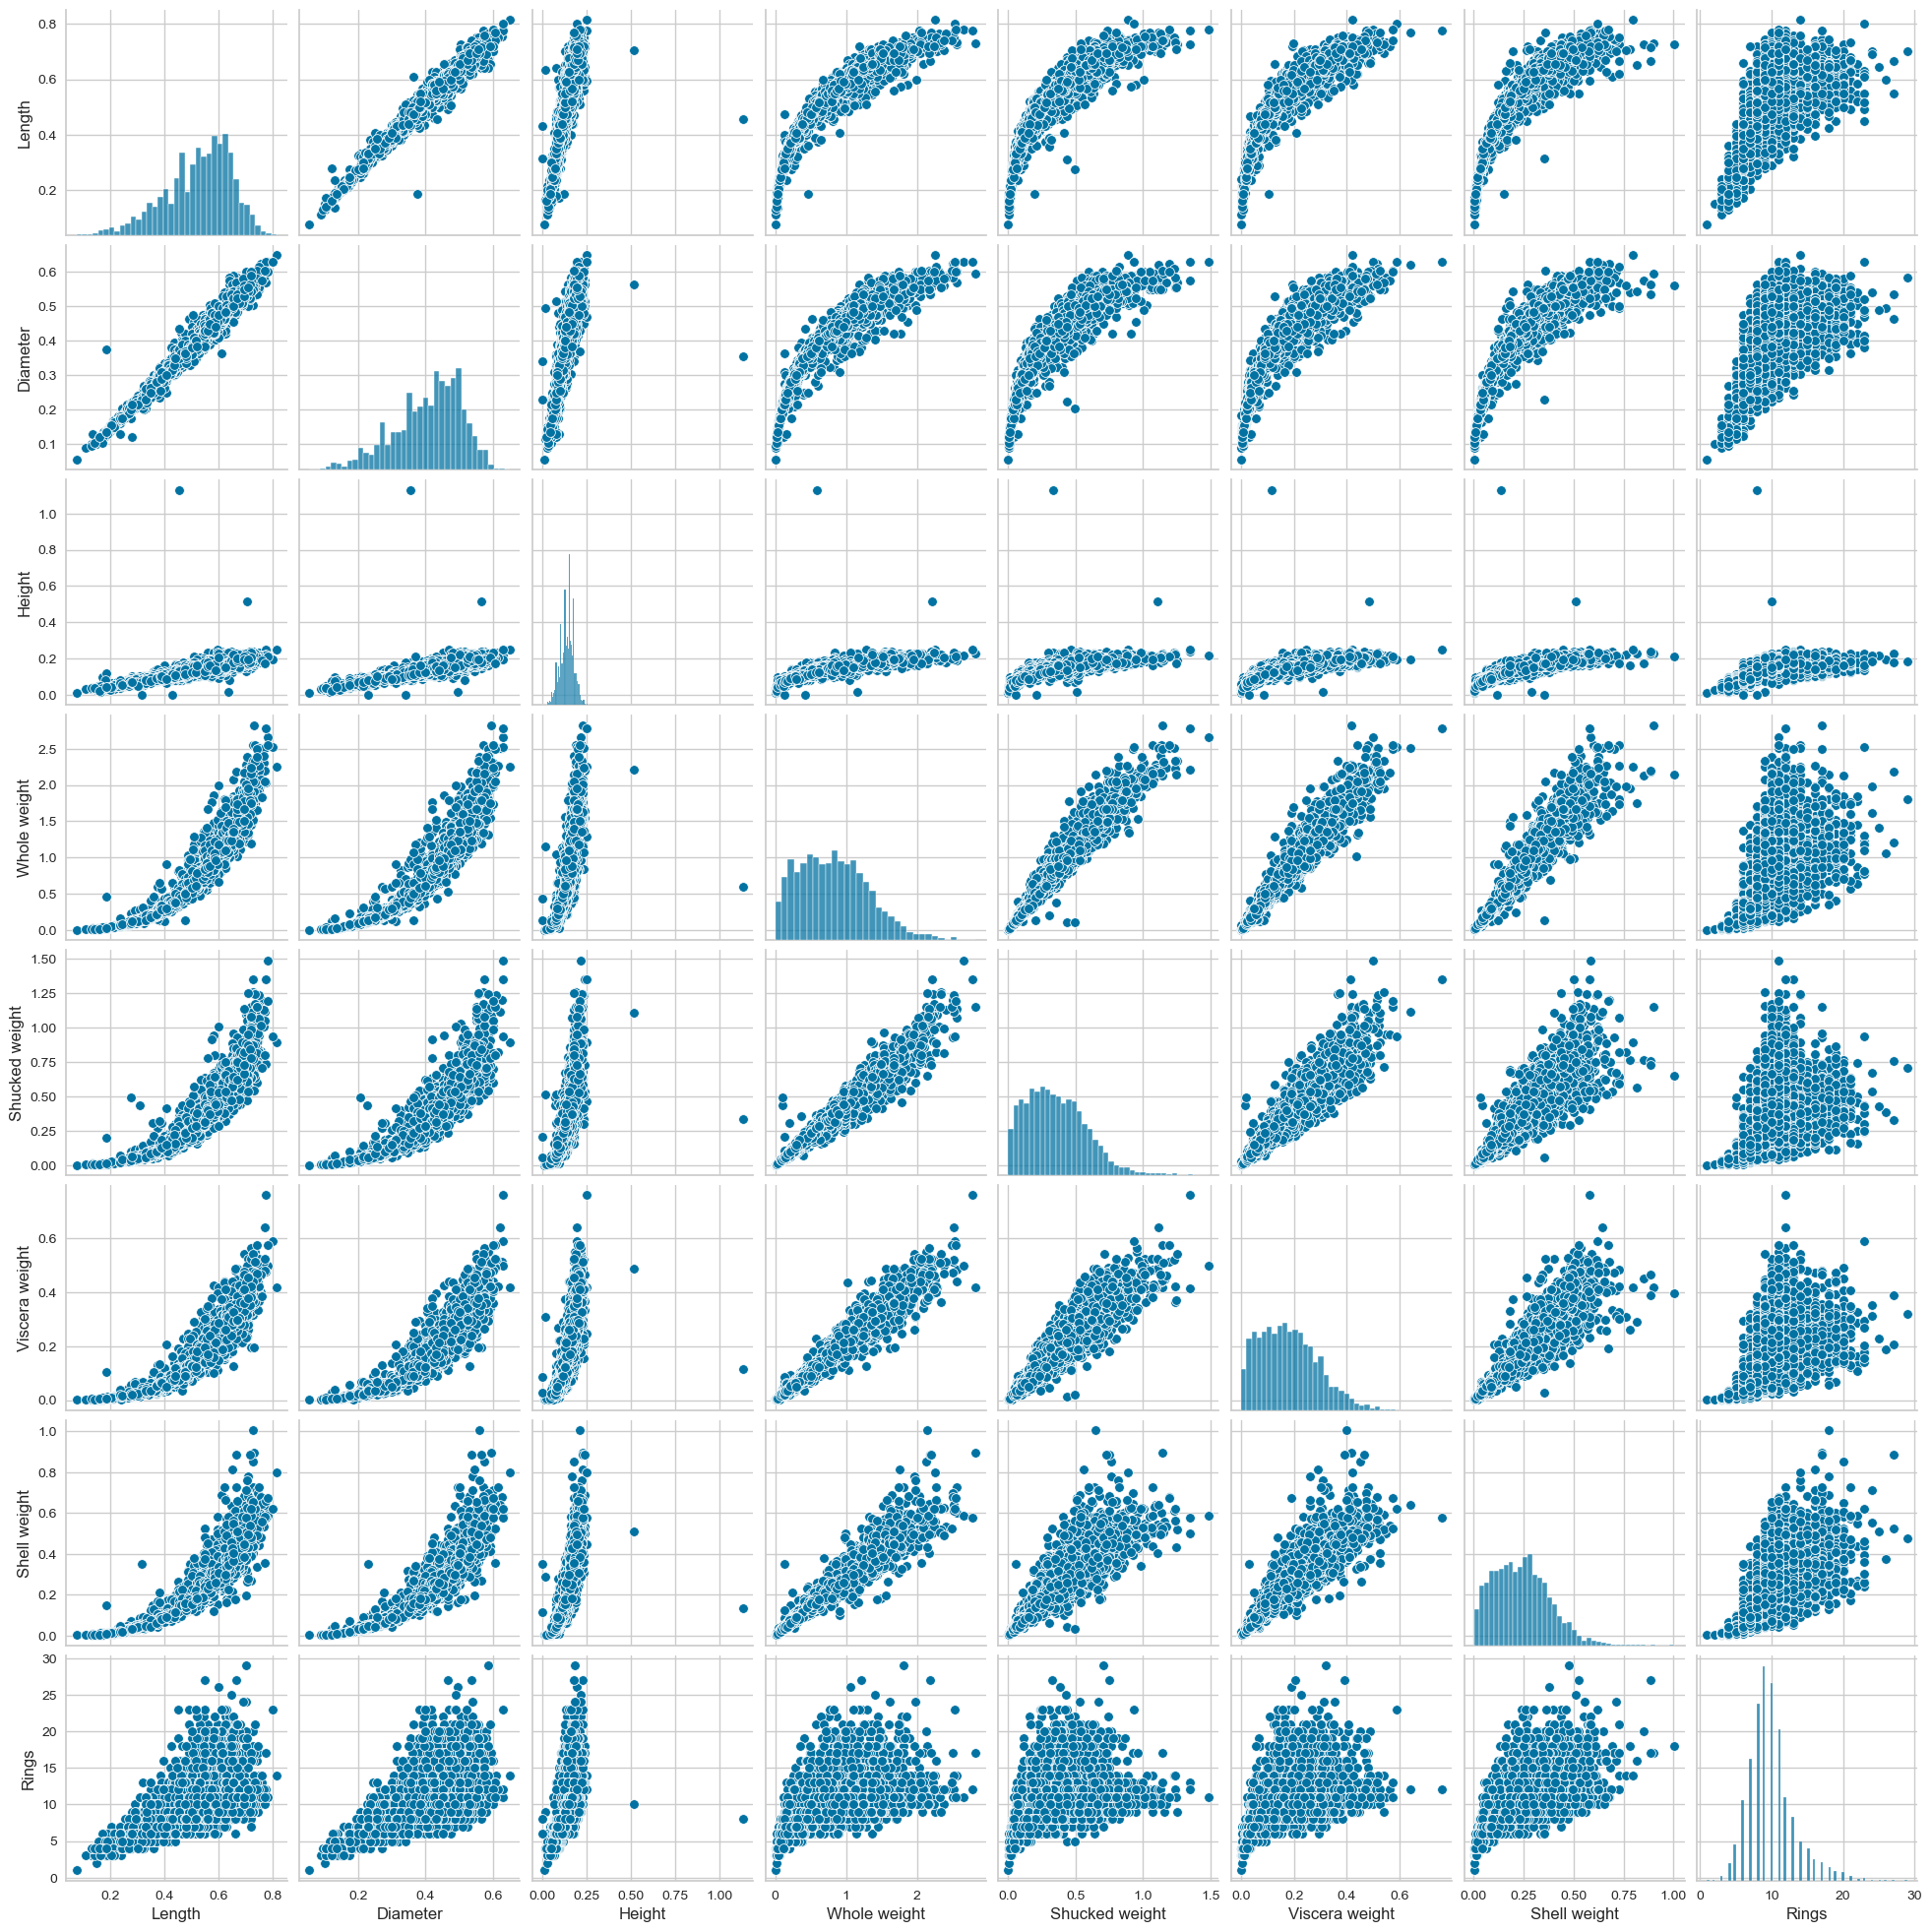

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
# Rank variables based on correlation
df.corr()['Rings'].sort_values()

Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [14]:

#### Set variables ####

# Target variable:
y= df['Rings']

# Take all columns except target as predictor columns:
predictor_columns = [c for c in df.columns if c != 'Rings']

# Load the dataset as a pandas data frame
x = pd.DataFrame(df, columns = predictor_columns)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [16]:
# Create a model for Linear Regression
lr = LinearRegression()

# Fit the model with the Training data
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
# Calculate the score (R^2 for Regression) for Training Data
lr.score(x_train, y_train)

0.5357510639819221

### Cross Validation

In [18]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [40]:
# Set up 5-fold cross validation
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(x)):

    # Get training and test sets for X and y
    x_train = x.iloc[train, ]
    y_train = y.iloc[train, ]
    x_test = x.iloc[test, ]
    y_test = y.iloc[test, ]

    # Fit model with training set
    lr.fit(x_train, y_train)

    # Make predictions with training and test set
    train_preds = lr.predict(x_train)
    test_preds = lr.predict(x_test)

    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(x_train, y_train))
    test_scores.append(lr.score(x_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))
    
    

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores,
                           'Test R2': test_scores,
                           'Training RMSE': train_rmse,
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])
metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.540572,0.409510,2.216301,2.330562
2,0.523881,0.541106,2.226669,2.172744
3,0.532221,0.507990,2.206573,2.254138
4,0.523466,0.539618,2.191231,2.317015
5,0.523240,0.543264,2.223766,2.185648


In [41]:
# Data from the table
training_r2 = [0.527137, 0.539753, 0.516508, 0.523244, 0.535794]
test_r2 = [0.518389, 0.471809, 0.564354, 0.542736, 0.469072]
training_rmse = [2.186931, 2.211525, 2.214873, 2.257562, 2.194681]
test_rmse = [2.339977, 2.233630, 2.226240, 2.044962, 2.356430]

# Calculate the average (mean) for each column
avg_training_r2 = np.mean(training_r2)
avg_test_r2 = np.mean(test_r2)
avg_training_rmse = np.mean(training_rmse)
avg_test_rmse = np.mean(test_rmse)

print("Average Training R2: ", avg_training_r2)
print("Average Test R2: ", avg_test_r2)
print("Average Training RMSE: ", avg_training_rmse)
print("Average Test RMSE: ", avg_test_rmse)

Average Training R2:  0.5284872
Average Test R2:  0.513272
Average Training RMSE:  2.2131144
Average Test RMSE:  2.2402477999999997


#### Forward Feature Selection

In [20]:
show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [35]:
## Use Forward Feature Selection to pick a good model
# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression
# get the number of cases in the training data
n = x_train.shape[0]

while True:
    changed = False

    if show_steps:
        print('')

    # list the features to be evaluated
    excluded = list(set(x.columns) - set(included))

    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))

    # for each remaining feature to be evaluated
    for new_column in excluded:

        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(x_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = fit.score(x_train[included + [new_column]], y_train) # calculate the score
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( ( 1-r2)*(n-1)) / (n - k  - 1)) # calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' %
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' %
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' %
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = Shell weight, Shucked weight, Height, Viscera weight, Length, Whole weight, Diameter
(Step) Trying Shell weight...
(Step) - Features = Shell weight
(Step) - Adjusted R^2: This = 0.391; Best = 0.000
(Step) - New Best!   : Feature = Shell weight; R^2 = 0.392; Adjusted R^2 = 0.391
(Step) Trying Shucked weight...
(Step) - Features = Shucked weight
(Step) - Adjusted R^2: This = 0.177; Best = 0.391
(Step) Trying Height...
(Step) - Features = Height
(Step) - Adjusted R^2: This = 0.357; Best = 0.391
(Step) Trying Viscera weight...
(Step) - Features = Viscera weight
(Step) - Adjusted R^2: This = 0.256; Best = 0.391
(Step) Trying Length...
(Step) - Features = Length
(Step) - Adjusted R^2: This = 0.307; Best = 0.391
(Step) Trying Whole weight...
(Step) - Features = Whole weight
(Step) - Adjusted R^2: This = 0.293; Best = 0.391
(Step) Trying Diameter...
(Step) - Features = Diameter
(Step) - Adjusted R^2: This = 0.328; Best = 0.391
Added feature Shell weight with R^2 = 0.392 and 

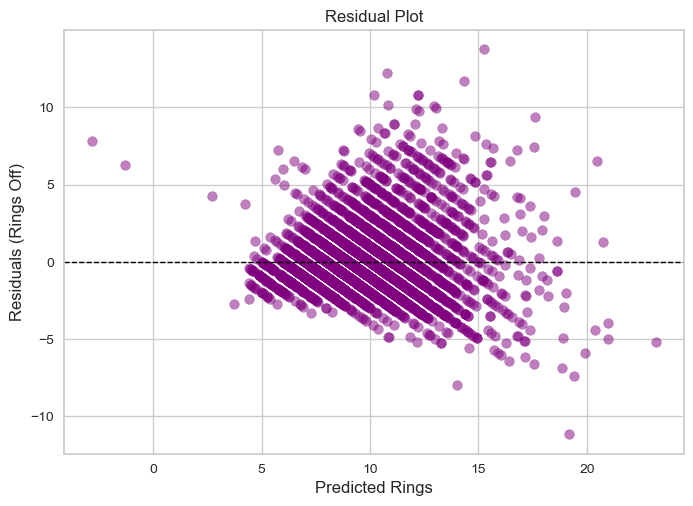

In [38]:
residuals = y - y_pred  # Calculate residuals

# Plotting residuals
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Predicted Rings')
plt.ylabel('Residuals (Rings Off)')
plt.title('Residual Plot')
plt.show()

## Lasso Regression Model

In [22]:
# create a model object to hold the modelling parameters
lassomodel = Lasso()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6,6,200)

# Train the model with different regularization strengths
for a in lasso_alphas:
    lassomodel.set_params(alpha=a)
    lassomodel.fit(x,y)
    coefs.append(lassomodel.coef_)
    errors.append(mean_squared_error(lassomodel.coef_, model.coef_))

C:\Users\Orie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.753e+00, tolerance: 4.341e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Orie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.450e+00, tolerance: 4.341e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Orie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.685e+00, tolerance: 

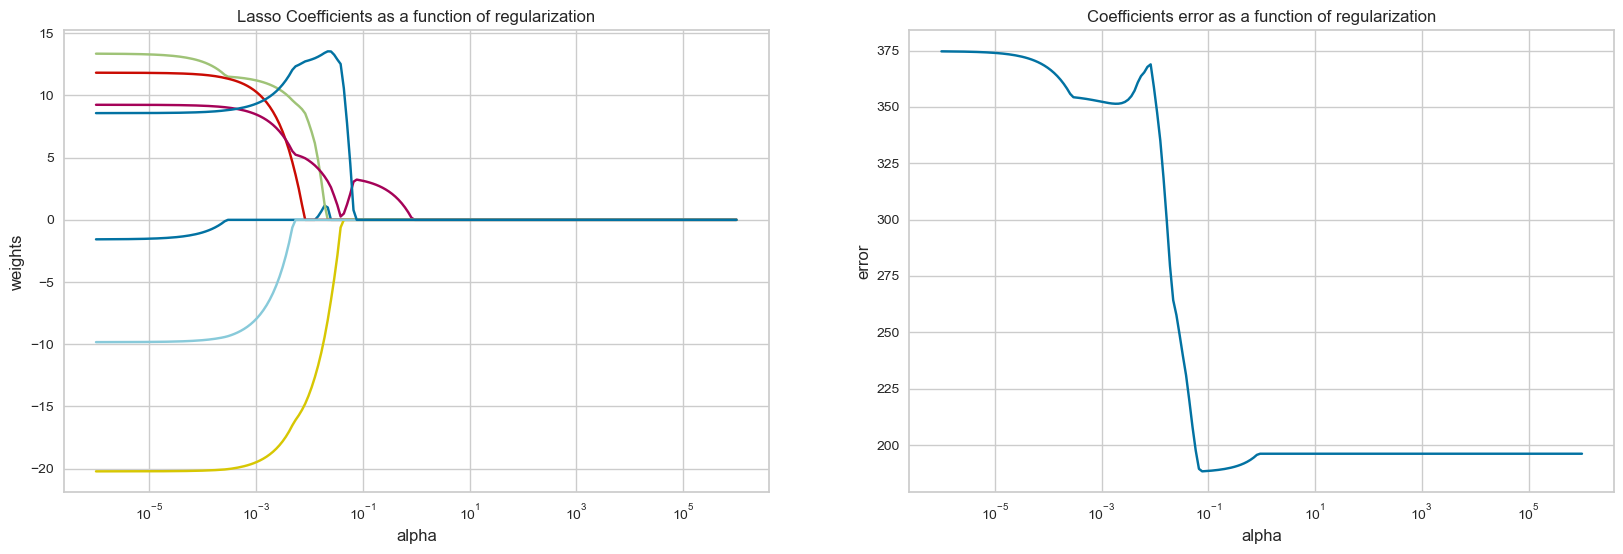

In [23]:
# Display results
plt.figure(figsize= (20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso Coefficients as a function of regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficients error as a function of regularization')
plt.axis('tight')

plt.show()

In [24]:
# Find Optimal Lasso Using LassoCV
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(x, y)
print('Alpha: ', optimal_lasso.alpha_)
print('Score: ', optimal_lasso.score(x,y))

Alpha:  0.001366716356462006
Score:  0.5266956195693042


In [25]:
def view_coeff(x, model):
    model_coefs = pd.DataFrame({'variable': x.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

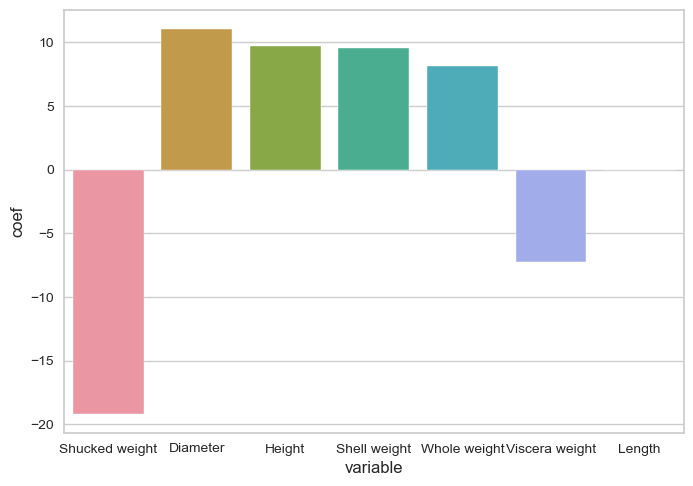

In [26]:
# Plot Coefficient
view_coeff(x, optimal_lasso)

In [31]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 0.001366716356462006)
lasso.fit(x_train,y_train)
train_score_ls =lasso.score(x_train,y_train)
test_score_ls =lasso.score(x_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.5343994809920983
The test score for ls model is 0.48921400333732645


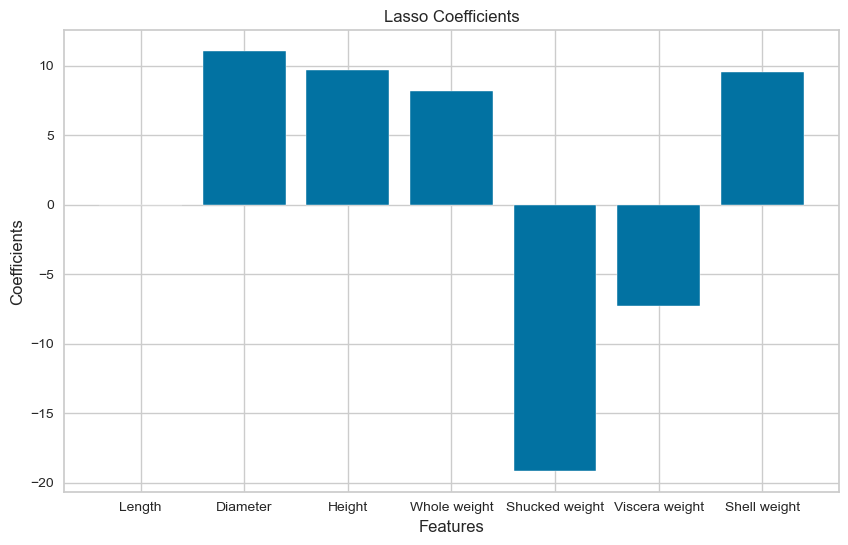

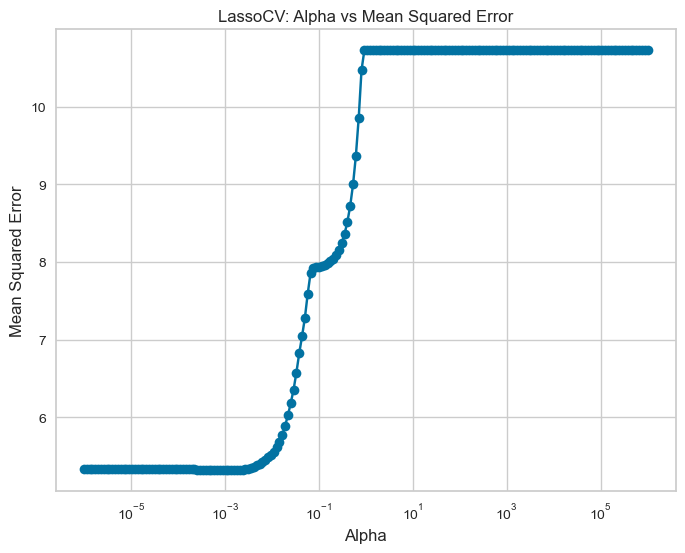

In [33]:
# LassoCV provides the alpha path it explored and the corresponding scores
alphas = optimal_lasso.alphas_  # the list of alphas considered
mse_path = optimal_lasso.mse_path_  # the mean squared error for each fold and alpha

mean_mse = np.mean(mse_path, axis=1)  # mean MSE across all folds

plt.figure(figsize=(8, 6))
plt.plot(alphas, mean_mse, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('LassoCV: Alpha vs Mean Squared Error')
plt.show()

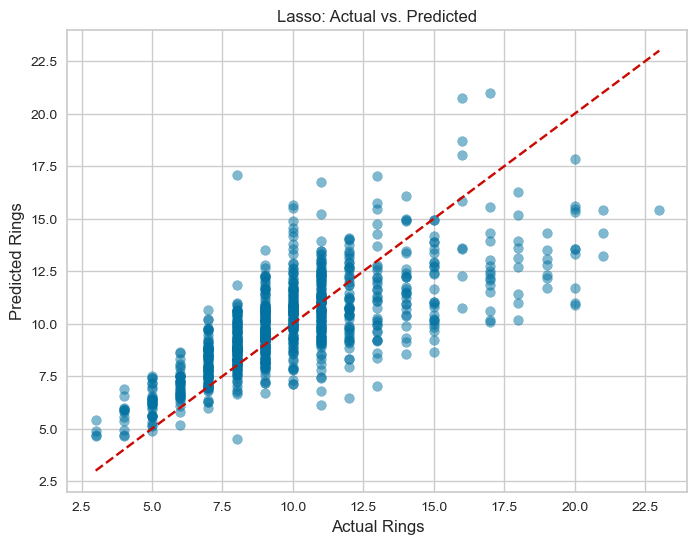

In [39]:
y_pred = optimal_lasso.predict(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Scatter plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Lasso: Actual vs. Predicted')
plt.show()

In [42]:
# Fit a Lasso regression model (use your trained model)
lasso = Lasso(alpha=0.001366716356462006)  # Example alpha
lasso.fit(x_train, y_train)

# Calculate R² for training and test sets
train_r2 = lasso.score(x_train, y_train)  # R² for training set
test_r2 = lasso.score(x_test, y_test)  # R² for test set

# Predict outcomes on training and test sets
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

# Calculate RMSE for training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Training R²:", train_r2)
print("Test R²:", test_r2)
print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Training R²: 0.5223194562657734
Test R²: 0.5429502690707542
Training RMSE: 2.225912101173496
Test RMSE: 2.1863978132237785
